# Project: No_Show_Appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


The data have 14 columns and we will explain each column and jop of it .

list of columns :

1- PatientId : show the id number of patient

2- Appointmentid : show the id number of appointment

3- Gender : show the gender of patients which 'M' for 'Male' and 'F' for Female'

4- ScheduledDay : show the day which patient set up the appointment

5- AppointmentDay : the day which patient select it

6- Age : show the age of patient

7- Neighbourhood : the place of hospital or clinic

8- Scholarship : show whether or not the patient is enrolled in Brasilian welfare program

9- Hipertension : show whether or not patient had hipertension which '0' for false and '1' for true

10- Diabetes : show whether or not patient had diabetes which '0' for false and '1' for true

11- Alcoholism	: show patient were drunkard or not which '0' for false and '1' for true

12- Handicap : show the rank of Handicap for patient 

13- SMS_received: show whether or not patient get a massege which '0' for false and '1' for true

14- No_Show : show the patient attendance which 'No' for attend and 'Yes' for not attend


we chosed the column of ' No_Show' to be the debendent variable .





### Question(s) for Analysis :


Question 1 :  How gender affect on the show up of patient  

Question 2 :  How age affect on the show up of patient  

Question 3 :  How neighbourhood affect on the show up of patient  

Question 4 :  How scholarship affect on the show up of patient  

Question 5 :  How hipertension  affect on the show up of patient  

Question 6 :  How diabetes affect on the show up of patient
 
Question 7 :  How alcoholism affect on the show up of patient  

Question 8 :  How handicap affect on the show up of patient  

Question 9 :  How receving sms affect on the show up of patient  

<a id='wrangling'></a>
## Data Wrangling



### gathering data

In [1]:
# Load your data and print out a few lines. Perform operations to inspect data
# import the libraries that you use
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


In [63]:
# load the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')



In [64]:
# print out a few lines
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Accessing and cleaning data

In [4]:
# the shape of the dataframe
df.shape

(110527, 14)

That mean the dataframe is 110527 rows and 14 columns

In [5]:
# get the summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# the age column have a value equal -1 and this is no logical 
# so we will remove it 
df= df.query('Age >= 0')
# then make sure that is removed
df[df['Age']== -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [7]:
# show the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  No-show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [8]:
# check the missing values and clean it
df.isnull().sum().any()

False

There is no any missing value

In [9]:
# check the duplicated values and clean it
sum(df.duplicated())

0

There is no any duplicated value

In [10]:
# fix the columns lables and print the new labels
df.rename(columns = lambda x : x.strip().lower().replace("-","_"),inplace= True)
df.rename(columns = {'handcap':'handicap'},inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

This the new labels which we make all is lower and changed 'no-show' to 'no_show' and 'handcap' to 'handicap'

In [11]:
# check the data type of columns and fix it 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110526 non-null  float64
 1   appointmentid   110526 non-null  int64  
 2   gender          110526 non-null  object 
 3   scheduledday    110526 non-null  object 
 4   appointmentday  110526 non-null  object 
 5   age             110526 non-null  int64  
 6   neighbourhood   110526 non-null  object 
 7   scholarship     110526 non-null  int64  
 8   hipertension    110526 non-null  int64  
 9   diabetes        110526 non-null  int64  
 10  alcoholism      110526 non-null  int64  
 11  handicap        110526 non-null  int64  
 12  sms_received    110526 non-null  int64  
 13  no_show         110526 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [12]:
# convert scheduledday column type from string to datetime
df['scheduledday']= pd.to_datetime(df['scheduledday'])
df['scheduledday'].dtype

datetime64[ns, UTC]

Here we convert scheduledday column type from string to datetime

In [13]:
# drop  rows which will not benfit us in our analysis 
df.drop(['patientid','appointmentid','appointmentday','scheduledday'],axis = 1, inplace=True)

In [14]:
# display the dataframe after dropping
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


ok , the columns ['patientid','appointmentid','appointmentday','scheduledday'] had already droped

In [15]:
# show the dataframe after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   gender         110526 non-null  object
 1   age            110526 non-null  int64 
 2   neighbourhood  110526 non-null  object
 3   scholarship    110526 non-null  int64 
 4   hipertension   110526 non-null  int64 
 5   diabetes       110526 non-null  int64 
 6   alcoholism     110526 non-null  int64 
 7   handicap       110526 non-null  int64 
 8   sms_received   110526 non-null  int64 
 9   no_show        110526 non-null  object
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


The data is really clean now and there is no null or duplicated values and columns type were fixed 

ok,you can continue now



### for make the analysis easiear we will creat two dataframes to patiens who attend and patiens did not



In [16]:
# creat a dataframe to patients attended
df_no = df.query('no_show == "No"')

In [17]:
# display some rows 
df_no.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Then, we creat a dataframe df_no to patients attended

In [18]:
# creat a dataframe to patients not attended
df_yes = df.query('no_show == "Yes"')

In [19]:
df_yes.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,no_show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


  Then, we creat a dataframe df_yes to patients not attended

<a id='eda'></a>


## Exploratory Data Analysis



array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'scholarship'}>,
        <AxesSubplot:title={'center':'hipertension'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'alcoholism'}>,
        <AxesSubplot:title={'center':'handicap'}>],
       [<AxesSubplot:title={'center':'sms_received'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

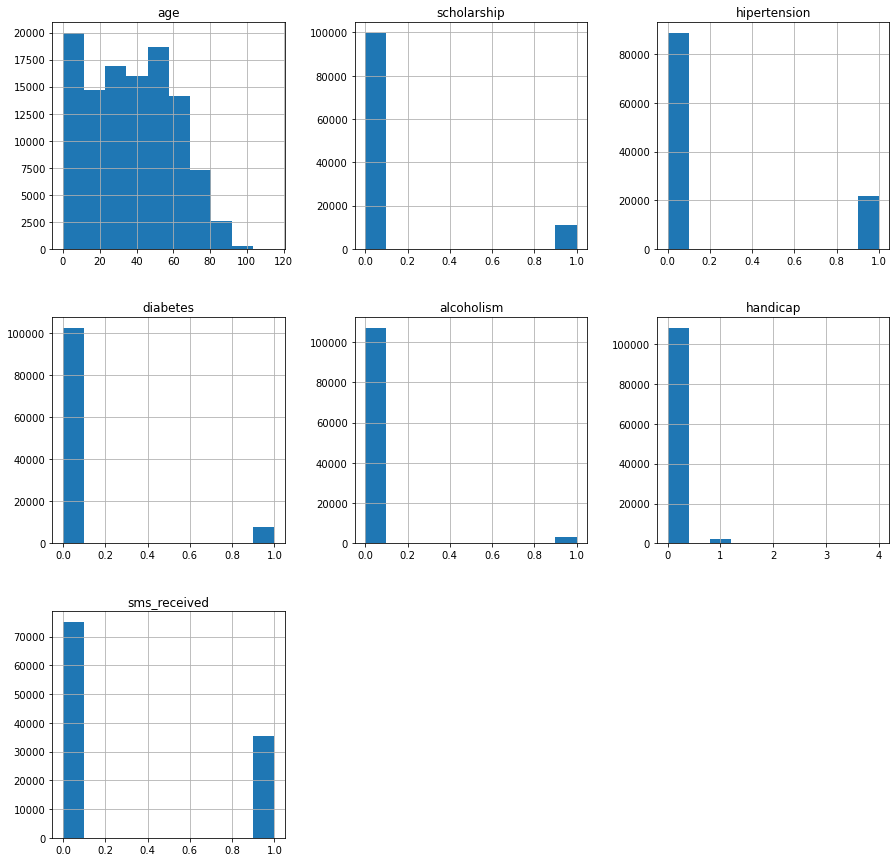

In [20]:
# by histogram of columns in this data set , show the distribution of it
df.hist(figsize = (15,15))

All this variables are right sekwed 

In [21]:
# get the count of pateitns attended and patients not
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

That mean 88207 patient attended and 22319 patient not attended

<AxesSubplot:title={'center':'count of pateitns attended and patients not'}>

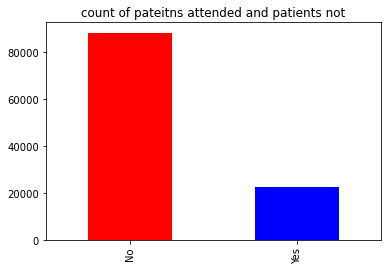

In [22]:
# visualize the counts
df['no_show'].value_counts().plot(kind = 'bar', color = ['red','blue'],title = 'count of pateitns attended and patients not')

### Research Question 1 (  How gender affect on the show up of patient  )

In [23]:
# count of male and female
df['gender'].value_counts()

F    71839
M    38687
Name: gender, dtype: int64

there are 71839 female and 38687 male

In [24]:
# count of male and female who attend
df_no['gender'].value_counts()

F    57245
M    30962
Name: gender, dtype: int64

there are 30962 male and 57245 female who attend

<AxesSubplot:title={'center':'count of males and females attended '}>

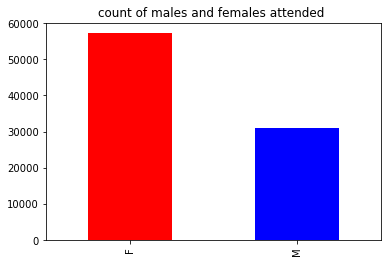

In [25]:
# visualize the counts
df_no['gender'].value_counts().plot(kind ='bar',color = ['red','blue'],title = 'count of males and females attended ')

In [26]:
# count of male and female who not attend
df_yes['gender'].value_counts()

F    14594
M     7725
Name: gender, dtype: int64

there are 7725 male and 14594 female who not attend

<AxesSubplot:title={'center':'count of males and females not attended '}>

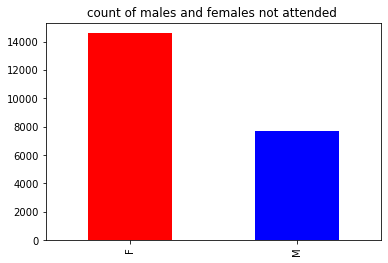

In [27]:
# visualize the counts
df_yes['gender'].value_counts().plot(kind ='bar',color = ['red','blue'],title = 'count of males and females not attended ')

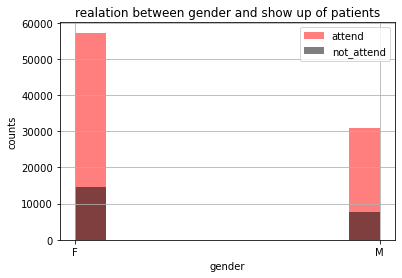

In [28]:
# now we display the realation between gender and show up of patients
df_no['gender'].hist( alpha = .5 , label='attend', color = ['red'])
df_yes['gender'].hist( alpha = .5 , label='not_attend' , color = ['black'])
plt.title('realation between gender and show up of patients')
plt.xlabel('gender')
plt.ylabel('counts')
plt.legend();

As we see there are about 79.6% of 71840 females had attended and about 80% of 38687 males had attended
and 20% of 71840 females had not attended and about 19% of 38687 males had not attended

so based on that the two percentages are nearly the same :(the gender don`t affect on show up of patients)


### Research Question 2  (  How age affect on the show up of patient  )

In [29]:
# find the mean of  age of pateints attended
df_no['age'].mean()

37.790504154999034

In [30]:
# find the mean of  age of pateints not attended
df_yes['age'].mean()

34.31766656212196

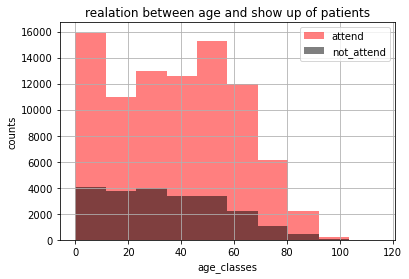

In [31]:
# now we display the realation between age and show up of patients
df_no['age'].hist( alpha = .5 , label='attend', color = ['red'])
df_yes['age'].hist( alpha = .5 , label='not_attend' , color = ['black'])
plt.title('realation between age and show up of patients')
plt.xlabel('age_classes')
plt.ylabel('counts')
plt.legend();


As we see in the figure  the classes of ages are different in patient attended and patient not and the class [0:10] had the maximum count of attendance and class[100:115] had the minimum count of attendance 
so we get that ( age is strongly affect on patient attendance )


### Research Question 3  (  How neighbourhood affect on the show up of patient   )

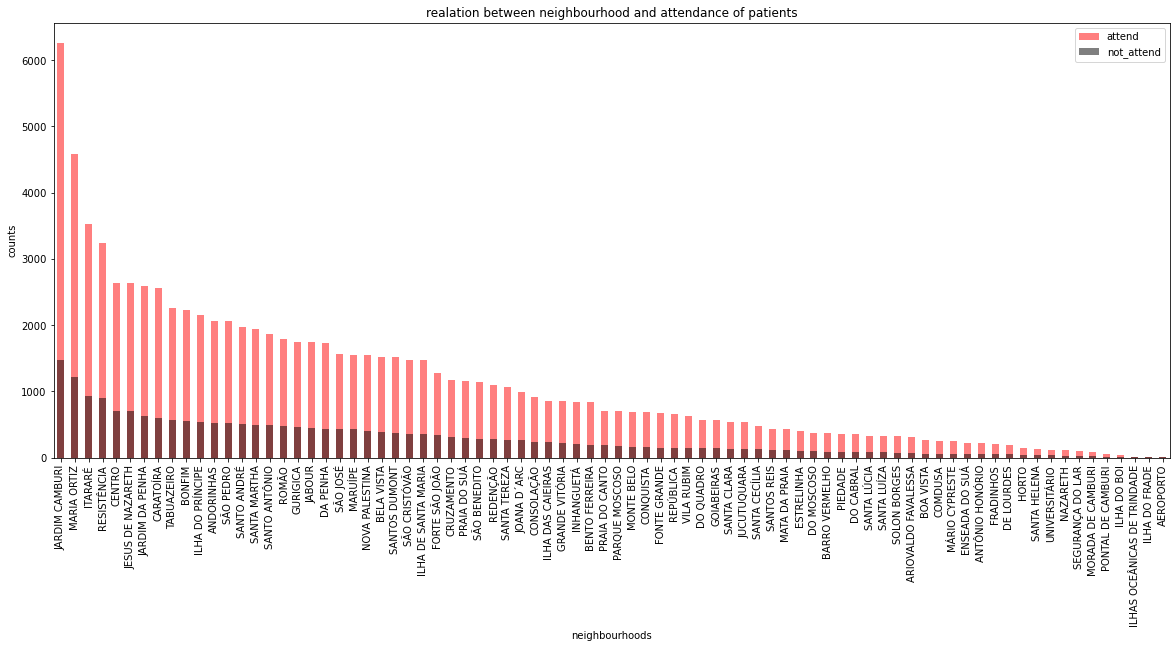

In [32]:
# show the realation between neighbourhood and show up of patients
plt.figure(figsize = (20,8))
df_no['neighbourhood'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['neighbourhood'].value_counts().plot(kind='bar',alpha =.5,color=['black'],label = 'not_attend')
plt.title('realation between neighbourhood and attendance of patients')
plt.xlabel('neighbourhoods')
plt.ylabel('counts')
plt.legend();


As we see in the figure from the precentiles that the JARDIM CAMBURI had the greatest count of show up 
so we get that ( neighbourhood stongly effect on patients attendance )

### Research Question 4  (  How scholarship affect on the show up of patient  )

In [33]:
# count of haveing a scholarship
df['scholarship'].value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

that mean 10861 of patients had a scholarship and 99665 had not

In [34]:
# count of haveing a scholarship for pateints attended
df_no['scholarship'].value_counts()

0    79924
1     8283
Name: scholarship, dtype: int64

that mean 8283 of patient atteded had a scholarship and 79925 had not

In [35]:
# count of haveing a scholarship and pateints not attended
df_yes['scholarship'].value_counts()

0    19741
1     2578
Name: scholarship, dtype: int64

that mean 2578 of patient not atteded had a scholarship and 19741 had not

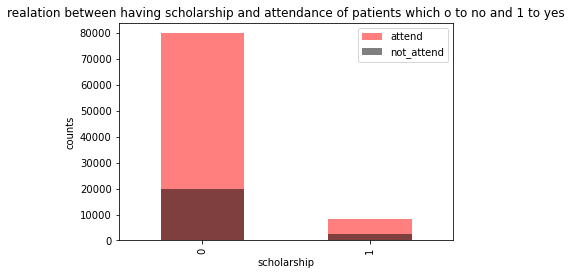

In [36]:
# now we display the realation between scholarship and show up of patients
df_no['scholarship'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['scholarship'].value_counts().plot(kind='bar' ,alpha =.5,color=['black'],label = 'not_attend' )
plt.title('realation between having scholarship and attendance of patients which o to no and 1 to yes')
plt.xlabel('scholarship')
plt.ylabel('counts')
plt.legend();


As we see there are about 80% of 99666 pateints not have scholarship had attended and about 76% of 10861 pateints have scholarship had attended
and 20% of 99666  pateints not have scholarship had not attended and about 24% of 10861 pateints have scholarship had not attended

so based on that the percentages :( the scholarship affect on show up of patients )


### Research Question 5  (  How hipertension  affect on the show up of patient  )

In [37]:
# count of haveing a hipertension
df['hipertension'].value_counts()

0    88725
1    21801
Name: hipertension, dtype: int64

that mean 21801 of patients had a hipertension and 88725 had not

In [38]:
# count of haveing a hipertension for pateints attended
df_no['hipertension'].value_counts()

0    70178
1    18029
Name: hipertension, dtype: int64

that mean 18029 of patient atteded had a hipertension and 70178 had not

In [39]:
# count of haveing a hipertension for pateints not attended
df_yes['hipertension'].value_counts()

0    18547
1     3772
Name: hipertension, dtype: int64

that mean 3772 of patient not atteded had a hipertension and 18547 had not

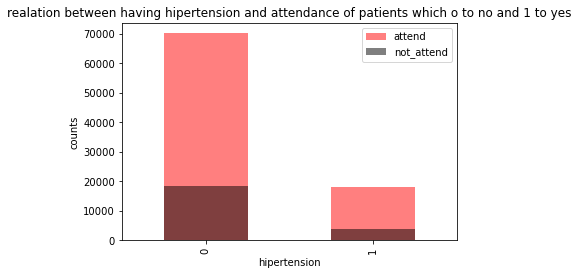

In [40]:
#now we display the realation between hipertension and show up of patients
df_no['hipertension'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['hipertension'].value_counts().plot(kind='bar' ,alpha =.5,color=['black'],label = 'not_attend' )
plt.title('realation between having hipertension and attendance of patients which o to no and 1 to yes')
plt.xlabel('hipertension')
plt.ylabel('counts')
plt.legend();


As we see there are about 79% of 88726 pateints not have hipertension had attended and about 83% of 21801 pateints have hipertension had attended
and 21% of 88726  pateints not have hipertension had not attended and about 17% of 21801 pateints have hipertension had not attended

so based on that the percentages :( the hipertension not affect on show up of patients )


### Research Question 6  (  How diabetes affect on the show up of patient  )

In [41]:
# count of haveing a diabetes
df['diabetes'].value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

that mean 7943 of patients had a diabetes and 102583 had not

In [42]:
# count of haveing a diabetes and not for pateints attended
df_no['diabetes'].value_counts()

0    81694
1     6513
Name: diabetes, dtype: int64

that mean 6513 of patients atteded had a diabetes and 81694 had not

In [43]:
# count of haveing a diabetes and not for pateints not attended
df_yes['diabetes'].value_counts()

0    20889
1     1430
Name: diabetes, dtype: int64

that mean 1430 of patients not atteded had a diabetes and 20889 had not

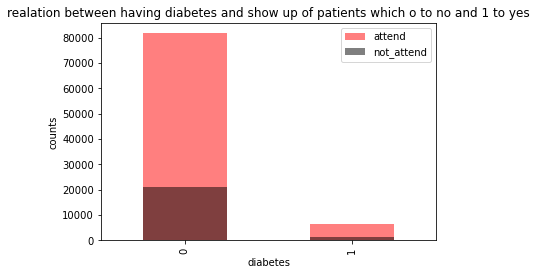

In [44]:
#now we display the realation between diabetes and show up of patients
df_no['diabetes'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['diabetes'].value_counts().plot(kind='bar' ,alpha =.5,color=['black'],label = 'not_attend')
plt.title('realation between having diabetes and show up of patients which o to no and 1 to yes')
plt.xlabel('diabetes')
plt.ylabel('counts')
plt.legend();


As we see there are about 80% of 102584 pateints not have diabetes had attended and about 82% of 7943 pateints have diabetes had attended
and 20% of 102584  pateints not have diabetes had not attended and about 18% of 7943 pateints have diabetes had not attended

so based on that the percentages :( the diabetes not affect on show up of patients )


### Research Question 7  (  How alcoholism affect on the show up of patient  )

In [45]:
# count of haveing a alcoholism 
df['alcoholism'].value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

that mean 3360 of patients had  alcoholism and 107166 had not

In [46]:
# count of haveing a alcoholism for pateints  attended
df_no['alcoholism'].value_counts()

0    85524
1     2683
Name: alcoholism, dtype: int64

that mean 2683 of patients atteded had  alcoholism and 85524 had not

In [47]:
# count of haveing a alcoholism for pateints not attended
df_yes['alcoholism'].value_counts()

0    21642
1      677
Name: alcoholism, dtype: int64

that mean 677 of patient not atteded had  alcoholismn and 21642 had not

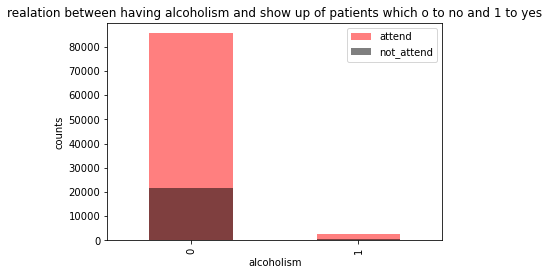

In [48]:
#now we display the realation between alcoholism and show up of patients
df_no['alcoholism'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['alcoholism'].value_counts().plot(kind='bar' ,alpha =.5,color=['black'],label = 'not_attend')
plt.title('realation between having alcoholism and show up of patients which o to no and 1 to yes')
plt.xlabel('alcoholism')
plt.ylabel('counts')
plt.legend();


As we see there are about 80% of 107167 pateints not have alcoholism had attended and about 80% of 3360 pateints have alcoholism had attended
and 20% of 107167  pateints not have alcoholism had not attended and about 20% of 3360 pateints have alcoholism had not attended

so based on that the percentages :( the alcoholism don`t affect on show up of patients )


### Research Question 8  (  How handicap affect on the show up of patient  )

In [49]:
# count of haveing a handicap
df['handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

that mean 108285 of patients had not  handicap and 2042 had 'handicap 1' and 183 had 'handicap 2'
and 13 had 'handicap 3' and 3 had 'handicap 4'

In [50]:
# count of haveing a handicap for pateints attended
df_no['handicap'].value_counts()

0    86373
1     1676
2      146
3       10
4        2
Name: handicap, dtype: int64

that mean 86373 of patients attendent had not  handicap and 1676 had 'handicap 1' and 146 had 'handicap 2'
and 10 had 'handicap 3' and 2 had 'handicap 4'

In [51]:
# count of haveing a handicap for pateints not attended
df_yes['handicap'].value_counts()

0    21912
1      366
2       37
3        3
4        1
Name: handicap, dtype: int64

that mean 21912 of patients not attendent had not  handicap and 366 had 'handicap 1' and 37 had 'handicap 2'
and 3 had 'handicap 3' and 1 had 'handicap 4'

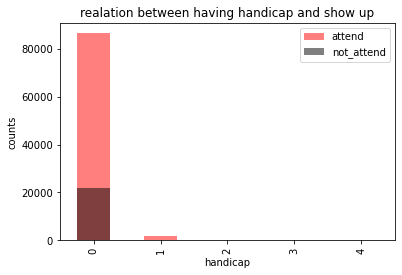

In [52]:
#now we display the realation between handcap and show up of patients
df_no['handicap'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['handicap'].value_counts().plot(kind='bar' ,alpha =.5,color=['black'],label = 'not_attend')
plt.title('realation between having handicap and show up')
plt.xlabel('handicap')
plt.ylabel('counts')
plt.legend();


As we see there are about 79.7% of 108286 pateints not have alcoholism had attended 20% of 108286  pateints not have handicap had not attended 

and about 82% of 2042 pateints have handicap 1  had attended and about 18% of 2042 pateints have handicap 1  had not attended 

and about 79.9% of 183 pateints have handicap 2  had attended and about 20% of 183 pateints have handicap 2  had not attended 

and about 77% of 13 pateints have handicap 3  had attended and about 23% of 13 pateints have handicap 3 had not attended 

and about 66% of 3 pateints have handicap 4  had attended and about 33% of 3 pateints have handicap 4 had not attended 
 
so based on that the percentages :( the  having handicap don`t affect on show up of patients )

### Research Question 9  (  How receving sms affect on the show up of patient  )

In [53]:
# counts of  receving sms
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

that mean 35482 of patients had received sms and 75044 had not

In [54]:
# counts of  receving sms for pateints attended
df_no['sms_received'].value_counts()

0    62509
1    25698
Name: sms_received, dtype: int64

that mean 25698 of patients attended had received sms and 62509 had not

In [55]:
# counts of  receving sms for pateints not attended
df_yes['sms_received'].value_counts()

0    12535
1     9784
Name: sms_received, dtype: int64

that mean 9784 of patients ont attended had received sms and 12535 had not

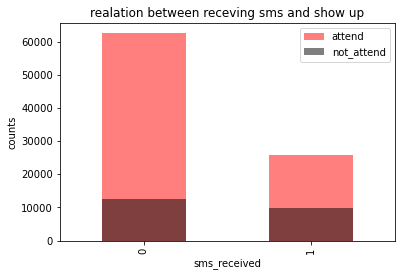

In [56]:
#now we display the realation between sms_received and show up of patients
df_no['sms_received'].value_counts().plot(kind='bar' ,alpha =.5,color=['red'],label = 'attend' )
df_yes['sms_received'].value_counts().plot(kind='bar' ,alpha =.5,color=['black'],label = 'not_attend' )
plt.title('realation between receving sms and show up')
plt.xlabel('sms_received')
plt.ylabel('counts')
plt.legend();


As we see there are about 83% of 75045 pateints not receve sms had attended and about 72% of 35482 pateints receve sms had attended
and 17% of 75045  pateints not receve sms had not attended and about 27.5% of 35482 pateints receve sms had not attended

so based on that the percentages :( the receving sms strongly affect on show up of patients )


<a id='conclusions'></a>
## Conclusions

Ok, here we finished our analysis process

let's look over the project and summrize the steps :

### step_1 : data wrangling

we gathered the data then moved to access and clean it and we found that :
1- there is no null values in the data
2- there is no duplicated variables in the data
3- we removed the outlires and fixed the columns dtype
4- we selected the columns that we need to analysis process and dropped the others
5- we splited the dataframe to two dataframes to complete analysis

### step_2 : Exploratory Data Analysis

we asked nine questions to explore the data and we selected the 'no_show' variable to be the dependent variable
and ('gender','age','neighbourhood','scholarship','hipertension','diabetes','handicap','sms_received') as independent variables we did the analysis to find What factors are important for us to know in order to predict if a patient will 
show up for their scheduled appointment? 
And we used the statistical methods and two tools (histogram , barchart) in our visualisation and found that :

#### Age : age affect on show up of patients which class [0;10] years old had the maximum counts of attendance

#### Neighbourhood : neighbourhood strongly affect on show up of patients 

#### Scholarship : Scholarship affect on on patient show up of patients

#### Sms_received : receving sms strongly affect on patient show up

### limitations :     

After finishing the analysis process ,we couldn't find that there is no correlation between patients show up and the factors 'gender','hipertension','diabetes','alcoholism' and 'handicap'


ok we here finished or analysis 
I hope to I could solve the problem efficiently , have a nice time 